In [17]:
from collections import Counter
import pickle
from config import TWITTER_DATA_DIR
import os
import matplotlib.pyplot as plt
import graph_tool.all as gt
import gzip
from config import FOLLOWER_DATA_DIR

# Loading All Tweets

In [19]:
with open(os.path.join(TWITTER_DATA_DIR, 'campaign_tweets.pkl'), 'rb') as f:
    tweets = pickle.load(f)

In [24]:
# process tweets by username into Counter
counts = Counter([tweet_info.get('username', '') for hashtag, tweet_dict in tweets.items() 
                  for tweet_id, tweet_info in tweet_dict.items()])

# Selecting Top Participants

In [115]:
def construct_follower_network(users, follower_thresh=5):
    '''
    Constructs a follower network for given input of users
    
    Args:
    follower_thresh (int): only followers who have this many tweets are included
    
    '''
    g = gt.Graph()
    username = g.new_vertex_property("string")
    g.vp.username = username
    id_to_vertex = {}
    
    def make_vertex(name, g=g, id_to_vertex=id_to_vertex, username=username):
        # helper function to make a vertex and update data structures
        if name in id_to_vertex:
            return id_to_vertex[name]
        else:
            v = g.add_vertex()
            username[v] = name
            id_to_vertex[name] = v
            return v        

    for user in users:
        path = os.path.join(FOLLOWER_DATA_DIR, user + '.gz')
        try:
            f = gzip.open(path, 'rb')
            v = make_vertex(user)
            followers = [x.split('\t')[1] for x in f.read().decode().strip().split('\n')]

            for follower in followers:
                if counts[follower] >= follower_thresh:
                    u = make_vertex(follower)
                    g.add_edge(u, v)
        except: 
            print(f'follower info for {user} missing at {path}')
            
    return g, id_to_vertex


In [132]:
n_users = 100
nodes = map(lambda x: x[0], counts.most_common(n_users))
g, ids = construct_follower_network(nodes, follower_thresh=100)

follower info for shankud05492751 missing at /home/jschless/whatsapp/data/FOLLOWER_NETWORK/shankud05492751.gz
follower info for surajrenucomm missing at /home/jschless/whatsapp/data/FOLLOWER_NETWORK/surajrenucomm.gz
follower info for rockybh63898993 missing at /home/jschless/whatsapp/data/FOLLOWER_NETWORK/rockybh63898993.gz
follower info for priyada07514980 missing at /home/jschless/whatsapp/data/FOLLOWER_NETWORK/priyada07514980.gz
follower info for biswambardas8 missing at /home/jschless/whatsapp/data/FOLLOWER_NETWORK/biswambardas8.gz
follower info for joydeep45268966 missing at /home/jschless/whatsapp/data/FOLLOWER_NETWORK/joydeep45268966.gz
follower info for shobhi_baraiya missing at /home/jschless/whatsapp/data/FOLLOWER_NETWORK/shobhi_baraiya.gz
follower info for reshma65133217 missing at /home/jschless/whatsapp/data/FOLLOWER_NETWORK/reshma65133217.gz
follower info for jigneshhalvadi2 missing at /home/jschless/whatsapp/data/FOLLOWER_NETWORK/jigneshhalvadi2.gz
follower info for sanj

In [133]:
gt.extract_largest_component(g, directed=False)

<GraphView object, directed, with 1564 vertices and 6903 edges, 1 internal vertex property, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x2aaad724c610, at 0x2aaad72a2ac0>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x2aaad724c610, at 0x2aaad727d340>, False), at 0x2aaad724c610>

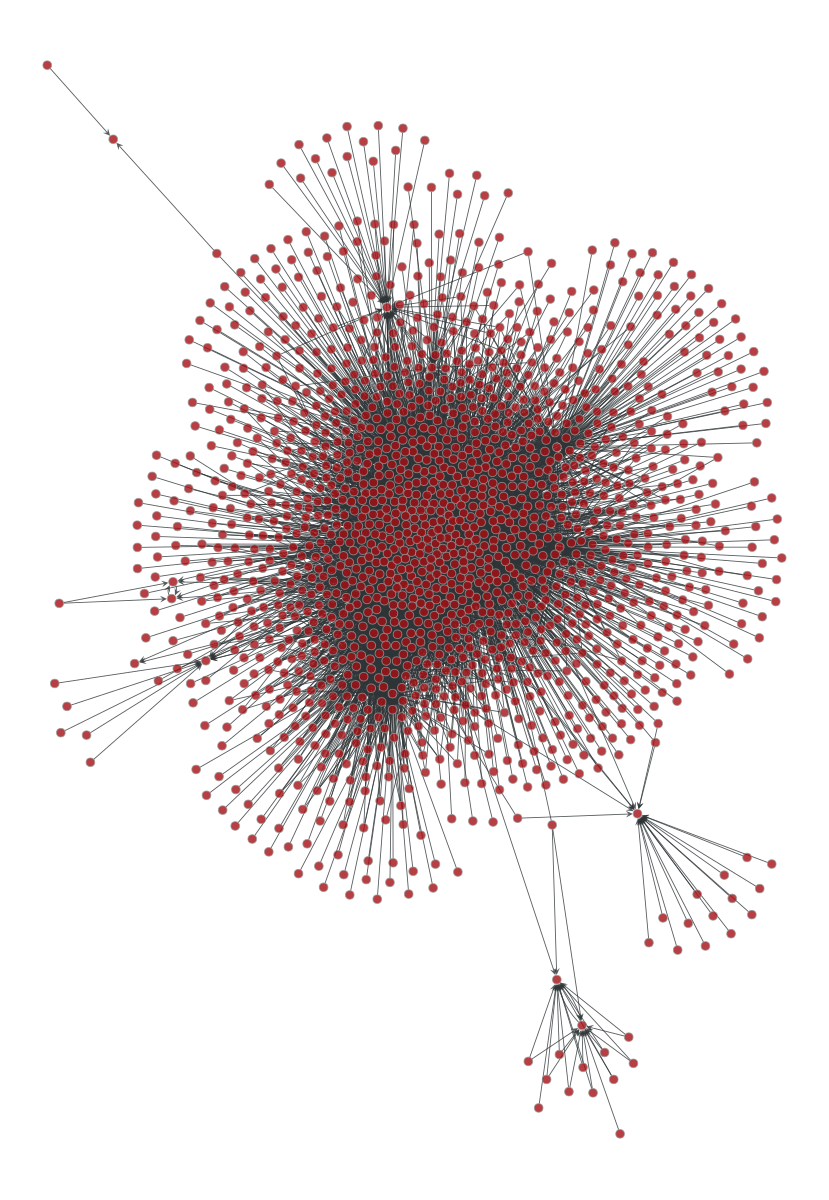

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2aaad724cc40, at 0x2aaad6a473a0>

In [135]:
gt.graph_draw(gt.extract_largest_component(g, directed=False))